<a href="https://colab.research.google.com/github/demoner21/machine-learning/blob/main/Cats_v_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training with a Larger Dataset - Cats and Dogs

In the previous lab you trained a classifier with a horses-v-humans dataset. You saw that despite getting great training results, when you tried to do classification with real images, there were many errors, due primarily to overfitting -- where the network  does very well with data that it has previously seen, but poorly with data it hasn't!

In this lab you'll look at a real, and very large dataset, and see the impact this has to avoid overfitting.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [ ]:
# --- Definição do Modelo (o mesmo que você já tem) ---
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# --- Compilação do Modelo ---
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

# --- Importando e Preparando o Dataset CatsVsDogs com tfds ---
print("Baixando e preparando o dataset CatsVsDogs...")
# Carrega apenas o split 'train'
(ds_full_train,), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train'], # Apenas o split 'train' está disponível
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
    data_dir='/tmp/tensorflow_datasets'
)
print("Dataset CatsVsDogs pronto!")

Baixando e preparando o dataset CatsVsDogs...
Dataset CatsVsDogs pronto!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Dividir o dataset 'train' em treinamento e validação
TRAIN_SIZE = 0.8 # 80% para treinamento, 20% para validação
# A informação sobre o número total de exemplos está em ds_info.splits['train'].num_examples
num_train_examples = ds_info.splits['train'].num_examples
num_validation_examples = int(num_train_examples * (1 - TRAIN_SIZE))
num_training_examples = num_train_examples - num_validation_examples

ds_train = ds_full_train.skip(num_validation_examples)
ds_test = ds_full_train.take(num_validation_examples)

In [ ]:
# Função para pré-processar as imagens
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150))
    image = tf.cast(image, tf.float32) / 255.0 # Normalização
    return image, label

# Aplicar o pré-processamento e batch
BATCH_SIZE = 250

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


--- Iniciando o Treinamento do Modelo ---
Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 394ms/step - acc: 0.5160 - loss: 1.2824 - val_acc: 0.5101 - val_loss: 0.7136
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 318ms/step - acc: 0.6028 - loss: 0.6668 - val_acc: 0.6810 - val_loss: 0.6261
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - acc: 0.6745 - loss: 0.6162 - val_acc: 0.6896 - val_loss: 0.6131
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 337ms/step - acc: 0.7006 - loss: 0.5685 - val_acc: 0.7120 - val_loss: 0.5405
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 325ms/step - acc: 0.7339 - loss: 0.5256 - val_acc: 0.7388 - val_loss: 0.5239
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 325ms/step - acc: 0.7448 - loss: 0.5134 - val_acc: 0.7659 - val_loss: 0.4859
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 323ms/step - acc: 0.7627 - loss: 0.4844 - val_acc: 0.7545 - val_loss: 0.4905
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 325ms/step - acc: 0.7874 - loss: 0.4526 - val_acc: 0.7515 - val_loss: 0.5055
Epoch

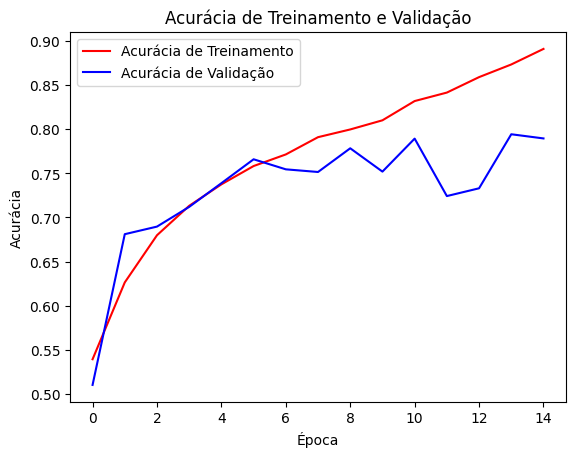

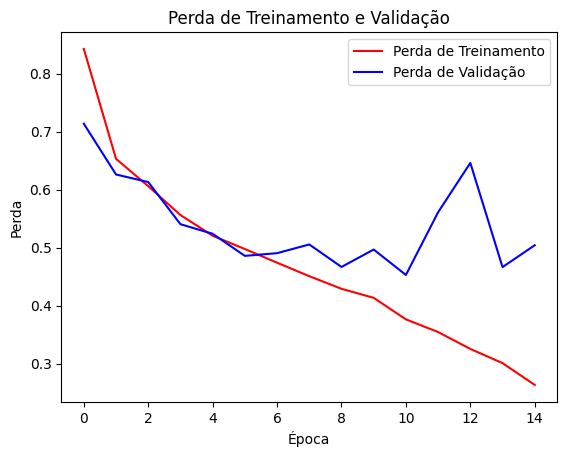

In [ ]:
# --- Treinamento do Modelo ---
print("\n--- Iniciando o Treinamento do Modelo ---")
history = model.fit(
    ds_train,
    epochs=15,
    validation_data=ds_test
)
print("--- Treinamento do Modelo Concluído ---\n")

# --- Plotando Métricas de Treinamento e Validação ---
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Acurácia de Treinamento")
plt.plot(epochs, val_acc, 'b', label="Acurácia de Validação")
plt.title('Acurácia de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label="Perda de Treinamento")
plt.plot(epochs, val_loss, 'b', label="Perda de Validação")
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

In [ ]:
model.save('cats_vs_dogs_model.h5')

In [ ]:
# --- Classificação de Imagem (para Google Colab) ---
print("\n--- Seção de Classificação de Imagens ---")
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print(fn + " é um cachorro")
    else:
        print(fn + " é um gato")


--- Seção de Classificação de Imagens ---


Saving R.jpeg to R (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
[0.]
R (1).jpeg é um gato


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from google.colab import files
from keras.preprocessing import image

# --- 1. Preparação dos Dados ---
CAT_DATA_DIR = '/tmp/my_cats_dataset'
CAT_TRAIN_DIR = os.path.join(CAT_DATA_DIR, 'train', 'cats')
CAT_VAL_DIR = os.path.join(CAT_DATA_DIR, 'validation', 'cats')

os.makedirs(CAT_TRAIN_DIR, exist_ok=True)
os.makedirs(CAT_VAL_DIR, exist_ok=True)

print("Baixando e preparando o dataset Stanford Dogs...")
(ds_dogs_full,), ds_info_dogs = tfds.load(
    'stanford_dogs',
    split=['train'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
    data_dir='/tmp/tensorflow_datasets'
)
print("Dataset Stanford Dogs pronto!")

num_dog_breeds = ds_info_dogs.features['label'].num_classes
print(f"Número de raças de cães no Stanford Dogs: {num_dog_breeds}")

num_total_dogs = ds_info_dogs.splits['train'].num_examples
val_split_ratio = 0.2
num_val_dogs = int(num_total_dogs * val_split_ratio)

ds_dogs_train_raw = ds_dogs_full.skip(num_val_dogs)
ds_dogs_val_raw = ds_dogs_full.take(num_val_dogs)

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

def preprocess_dogs(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_datagen_cats = ImageDataGenerator(rescale=1./255)
val_datagen_cats = ImageDataGenerator(rescale=1./255)

print("Carregando imagens de gatos...")
try:
    train_generator_cats_single = train_datagen_cats.flow_from_directory(
        os.path.join(CAT_DATA_DIR, 'train'),
        target_size=IMG_SIZE,
        batch_size=1,
        class_mode='categorical',
        classes=['cats'],
        shuffle=True
    )
    val_generator_cats_single = val_datagen_cats.flow_from_directory(
        os.path.join(CAT_DATA_DIR, 'validation'),
        target_size=IMG_SIZE,
        batch_size=1,
        class_mode='categorical',
        classes=['cats'],
        shuffle=False
    )
    num_cats_train = train_generator_cats_single.samples
    num_cats_val = val_generator_cats_single.samples
    print(f"Encontradas {num_cats_train} imagens de gatos para treinamento.")
    print(f"Encontradas {num_cats_val} imagens de gatos para validação.")

except Exception as e:
    print(f"AVISO: Não foi possível carregar imagens de gatos do diretório. Erro: {e}")
    print("Por favor, certifique-se de que '/tmp/my_cats_dataset/train/cats' e "
          "'/tmp/my_cats_dataset/validation/cats' contenham imagens de gatos.")
    num_cats_train = 0
    num_cats_val = 0
    train_generator_cats_single = None
    val_generator_cats_single = None


def preprocess_cats_for_dataset(image_batch, label_one_hot_batch):
    image = tf.squeeze(image_batch, axis=0)
    label_one_hot = tf.squeeze(label_one_hot_batch, axis=0)
    return image, tf.constant(num_dog_breeds, dtype=tf.int64)


ds_dogs_train_processed = ds_dogs_train_raw.map(preprocess_dogs, num_parallel_calls=tf.data.AUTOTUNE)
ds_dogs_val_processed = ds_dogs_val_raw.map(preprocess_dogs, num_parallel_calls=tf.data.AUTOTUNE)


if num_cats_train > 0 and train_generator_cats_single is not None:
    ds_cats_train_processed = tf.data.Dataset.from_generator(
        lambda: (preprocess_cats_for_dataset(*next(train_generator_cats_single)) for _ in range(num_cats_train)),
        output_signature=(
            tf.TensorSpec(shape=(IMG_SIZE[0], IMG_SIZE[1], 3), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.int64)
        )
    )
else:
    ds_cats_train_processed = tf.data.Dataset.from_tensor_slices(
        (tf.zeros((0, *IMG_SIZE, 3), dtype=tf.float32), tf.zeros((0,), dtype=tf.int64))
    )

if num_cats_val > 0 and val_generator_cats_single is not None:
    ds_cats_val_processed = tf.data.Dataset.from_generator(
        lambda: (preprocess_cats_for_dataset(*next(val_generator_cats_single)) for _ in range(num_cats_val)),
        output_signature=(
            tf.TensorSpec(shape=(IMG_SIZE[0], IMG_SIZE[1], 3), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.int64)
        )
    )
else:
    ds_cats_val_processed = tf.data.Dataset.from_tensor_slices(
        (tf.zeros((0, *IMG_SIZE, 3), dtype=tf.float32), tf.zeros((0,), dtype=tf.int64))
    )

ds_train = ds_dogs_train_processed.concatenate(ds_cats_train_processed) \
               .shuffle(buffer_size=1000) \
               .batch(BATCH_SIZE) \
               .prefetch(tf.data.AUTOTUNE)

ds_val = ds_dogs_val_processed.concatenate(ds_cats_val_processed) \
             .shuffle(buffer_size=1000) \
             .batch(BATCH_SIZE) \
             .prefetch(tf.data.AUTOTUNE)

num_total_classes = num_dog_breeds + 1
print(f"Total de classes para classificação: {num_total_classes} (0-{num_dog_breeds-1} para cães, {num_dog_breeds} para gatos)")


# --- 2. Construção do Modelo com Transfer Learning ---
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_total_classes, activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- 3. Treinamento do Modelo (Fase 1: Feature Extraction) ---
print("\n--- Iniciando o Treinamento do Modelo (Fase 1: Feature Extraction) ---")
initial_epochs = 10
history = model.fit(
    ds_train,
    epochs=initial_epochs,
    validation_data=ds_val
)
print("--- Treinamento do Modelo (Fase 1) Concluído ---\n")

# --- 4. Ajuste Fino (Fine-tuning) - Opcional, mas Recomendado ---
print("\n--- Iniciando o Ajuste Fino (Fase 2: Fine-tuning) ---")

base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine_tune = model.fit(
    ds_train,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=ds_val
)
print("--- Ajuste Fino (Fase 2) Concluído ---\n")

# --- 5. Salvar o Modelo ---
model_save_path = 'dog_breeds_and_cats_classifier.h5'
model.save(model_save_path)
print(f"Modelo salvo em: {model_save_path}")

# --- 6. Plotando Métricas de Treinamento e Validação ---

acc = history.history['accuracy'] + history_fine_tune.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine_tune.history['val_accuracy']
loss = history.history['loss'] + history_fine_tune.history['loss']
val_loss = history.history['val_loss'] + history_fine_tune.history['val_loss']

# The definitive fix: Ensure all lists are exactly the same length as 'epochs'
# Create the epochs list first based on what we expect the total number of epochs to be.
epochs_plot = list(range(total_epochs)) # This is the target length

# Now, trim all history lists to match this target length
# This is the crucial part that ensures consistent lengths
# It's possible for Keras history to sometimes record an extra step if a batch
# or validation step is completed just as an epoch ends.
# We'll explicitly truncate to the expected total_epochs.

if len(acc) > total_epochs:
    acc = acc[:total_epochs]
if len(val_acc) > total_epochs:
    val_acc = val_acc[:total_epochs]
if len(loss) > total_epochs:
    loss = loss[:total_epochs]
if len(val_loss) > total_epochs:
    val_loss = val_loss[:total_epochs]

# Print lengths to confirm after trimming
print(f"Length of acc (after trim): {len(acc)}")
print(f"Length of val_acc (after trim): {len(val_acc)}")
print(f"Length of loss (after trim): {len(loss)}")
print(f"Length of val_loss (after trim): {len(val_loss)}")
print(f"Length of epochs_plot: {len(epochs_plot)}") # This should be total_epochs

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_plot, acc, 'r', label="Acurácia de Treinamento")
plt.plot(epochs_plot, val_acc, 'b', label="Acurácia de Validação")
plt.title('Acurácia de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_plot, loss, 'r', label="Perda de Treinamento")
plt.plot(epochs_plot, val_loss, 'b', label="Perda de Validação")
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

# --- 7. Classificação de Imagem (for Google Colab) ---
print("\n--- Seção de Classificação de Imagens ---")

class_names_dogs = ds_info_dogs.features['label'].names
all_class_names = class_names_dogs + ['gato']

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(IMG_SIZE[0], IMG_SIZE[1]))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

    predictions = model.predict(x)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    predicted_label = all_class_names[predicted_class_idx]

    print(f"\nImagem: {fn}")
    print(f"Predição: {predicted_label} (Confiança: {confidence:.2f})")

# Limpar diretório dummy de gatos
try:
    shutil.rmtree(CAT_DATA_DIR)
    print(f"\nDiretório de gatos dummy '{CAT_DATA_DIR}' removido.")
except OSError as e:
    print(f"Erro ao remover o diretório dummy: {e}")

Baixando e preparando o dataset Stanford Dogs...
Dataset Stanford Dogs pronto!
Número de raças de cães no Stanford Dogs: 120
Carregando imagens de gatos...
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Encontradas 0 imagens de gatos para treinamento.
Encontradas 0 imagens de gatos para validação.
Total de classes para classificação: 121 (0-119 para cães, 120 para gatos)


/tmp/ipython-input-20-1078921617.py:151: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 121)            │       155,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,412,985 (9.20 MB)

 Trainable params: 155,001 (605.47 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


--- Iniciando o Treinamento do Modelo (Fase 1: Feature Extraction) ---
Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.0618 - loss: 4.7654 - val_accuracy: 0.3013 - val_loss: 2.8693
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.3699 - loss: 2.4777 - val_accuracy: 0.4517 - val_loss: 2.0664
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.5201 - loss: 1.7820 - val_accuracy: 0.5133 - val_loss: 1.7837
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5849 - loss: 1.4792 - val_accuracy: 0.5383 - val_loss: 1.6552
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.6167 - loss: 1.3215 - val_accuracy: 0.5529 - val_loss: 1.5759
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.6516 - loss: 1.2062 - val_accuracy: 0.5612 - val_loss: 1.5430
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.6736 - loss: 1.1342 - val_accuracy: 0.5742 - val_loss: 1.5147
Epoch 8/10
300/300

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 121)            │       155,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,412,985 (9.20 MB)

 Trainable params: 2,016,441 (7.69 MB)

 Non-trainable params: 396,544 (1.51 MB)

Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 63ms/step - accuracy: 0.5100 - loss: 1.9109 - val_accuracy: 0.5871 - val_loss: 1.4352
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.6173 - loss: 1.4671 - val_accuracy: 0.5792 - val_loss: 1.4298
Epoch 12/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.6585 - loss: 1.2851 - val_accuracy: 0.5913 - val_loss: 1.4020
Epoch 13/20
230/300 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6977 - loss: 1.1600